In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/End to End ML Project/placement.csv")
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
df.shape

(100, 4)

## Steps

0. Preproces + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


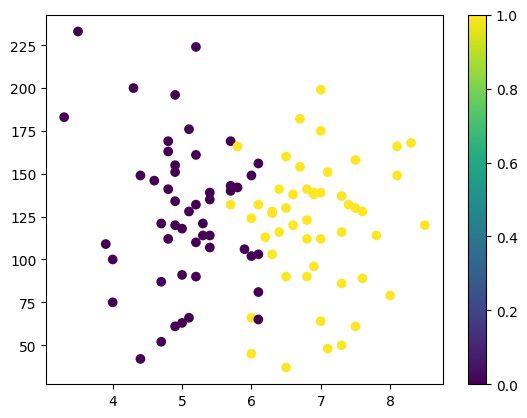

In [14]:
plt.scatter(df['cgpa'] , df['iq'], c=df['placement'])
plt.colorbar()

In [17]:
X = df.iloc[:, 0:2]
y = df.iloc[:,-1]

In [18]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [19]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.52779525,  0.33098911],
       [-2.32839637,  1.59412779],
       [ 1.35854878,  0.14678139],
       [-0.52779525, -0.40584178],
       [ 0.6726055 ,  0.01520445],
       [-0.61353816, -0.03742633],
       [-0.69928107,  1.01518923],
       [ 0.50111968,  0.40993528],
       [ 1.10132005,  0.38361989],
       [-1.38522435,  0.69940456],
       [ 0.84409132, -1.5374035 ],
       [-0.01333779, -0.53741872],
       [ 0.07240512,  0.25204295],
       [-1.12799562, -1.85318817],
       [ 0.6726055 ,  0.48888145],
       [ 0.41537677,  0.98887384],
       [ 0.92983423, -1.95844973],
       [ 0.84409132,  0.43625067],
       [ 0.75834841, -0.69531106],
       [-0.9565098 ,  0.30467373],
       [ 0.6726055 , -0.27426483],
       [ 0.50111968, -0.06374172],
       [ 1.78726333,  1.14676617],
       [ 0.07240512, -1.09004189],
       [-0.61353816, -0.22163405],
       [-0.78502398, -1.48477273],
       [-1.12799562, -0.03742633],
       [-2.15691054,  2.90989724],
       [ 0.58686259,

In [24]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.58686259,  0.83098151],
       [-0.27056652,  0.46256606],
       [ 0.32963386,  0.48888145],
       [ 0.84409132,  2.01517401],
       [-1.38522435, -2.11634206],
       [-0.69928107,  2.67305874],
       [-0.01333779,  0.04151984],
       [-0.9565098 , -1.61634967],
       [-0.78502398,  0.14678139],
       [ 0.24389094,  0.120466  ]])

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [26]:
# model training
clf.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
y_test

,placement
74,1
36,0
54,1
26,1
96,0
16,0
27,1
73,0
86,0
70,1


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

<Axes: >

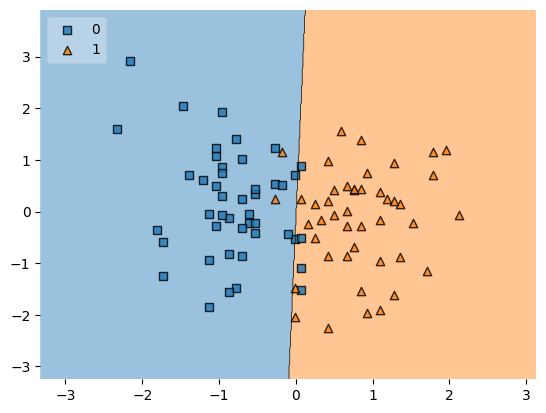

In [38]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [35]:
import pickle as pkl
pkl.dump(clf, open('model.pkl', 'wb'))

In [40]:
test_data = np.array([[8.2, 110]])
prediction = clf.predict(test_data)

if(prediction[0] == 0):
  print("Not Placed")
else:
  print("Placed")

Placed
